In [1]:
import Scribe as sc
from Scribe.Scribe import causal_net_dynamics_coupling as Scribe
import scanpy as sp
import numpy as np 
import os
import networkx as nx 
nx.__version__

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import dynamo as dyn 
import mygene
from anndata import AnnData

import sys
from importlib import reload
from pathlib import Path

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import scvelo as scv
scv.logging.print_version()


scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.set_figure_params('scvelo')  # for beautified visualization

%matplotlib inline

Running scvelo 0.2.2 (python 3.8.3) on 2020-09-15 15:49.


In [2]:
code_dir = os.getcwd()
base_dir = code_dir.replace("/codes_local","")
parent_dir = "/".join(base_dir.split("/")[:-1])
tools_dir = parent_dir + "/tools"

sys.path.insert(1, tools_dir)
import sc_addons
reload(sc_addons)

sp_name = base_dir.split("/")[-1]
analysis_name = ["0", "resampled"] ### Analysis name here

wk_dir = base_dir + "/3_Scribe/%s_Scribe_out_%s"%(analysis_name[0],analysis_name[1])
Path(wk_dir).mkdir(parents=True, exist_ok=True)
os.chdir(wk_dir)

print(sp_name, analysis_name)

0_Acute-Chronic ['0', 'resampled']


-----

In [3]:
scvelo_out = base_dir + "/2_scVelo/%s_scVelo_out_%s"%(analysis_name[0],analysis_name[1]) + '/' +'%s_scVelo_postPT.h5ad'%sp_name
adata = scv.read(scvelo_out)

Create causal_model successfully


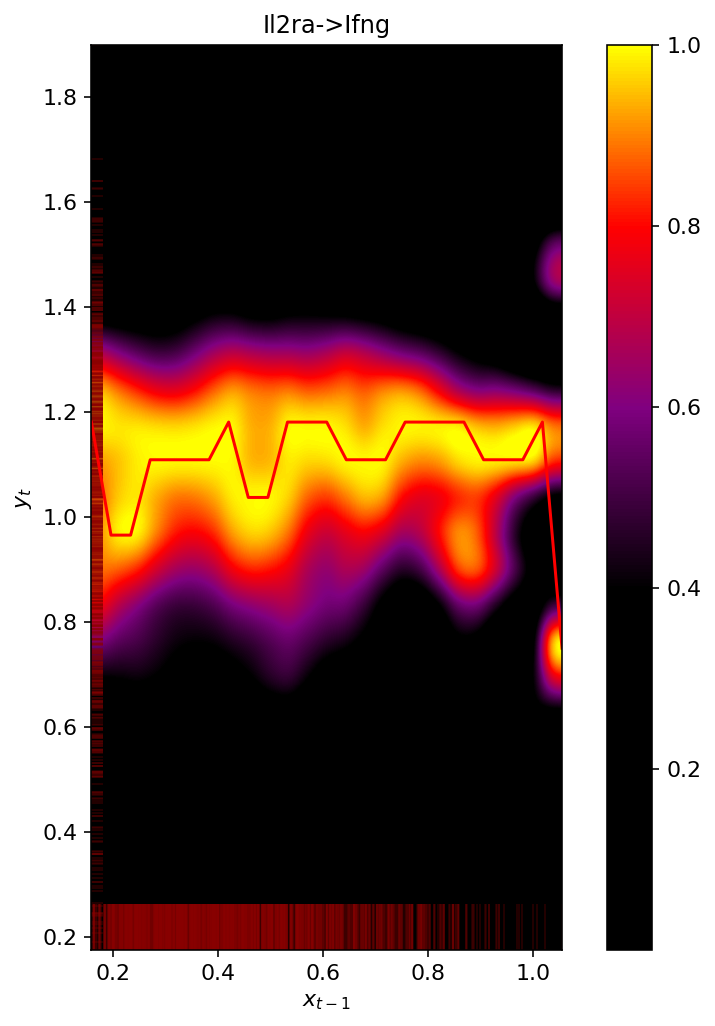

In [4]:
sc.pl.viz_response(adata, np.array([['Il2ra','Ifng']]),grid_num=25, log=True)

Create causal_model successfully


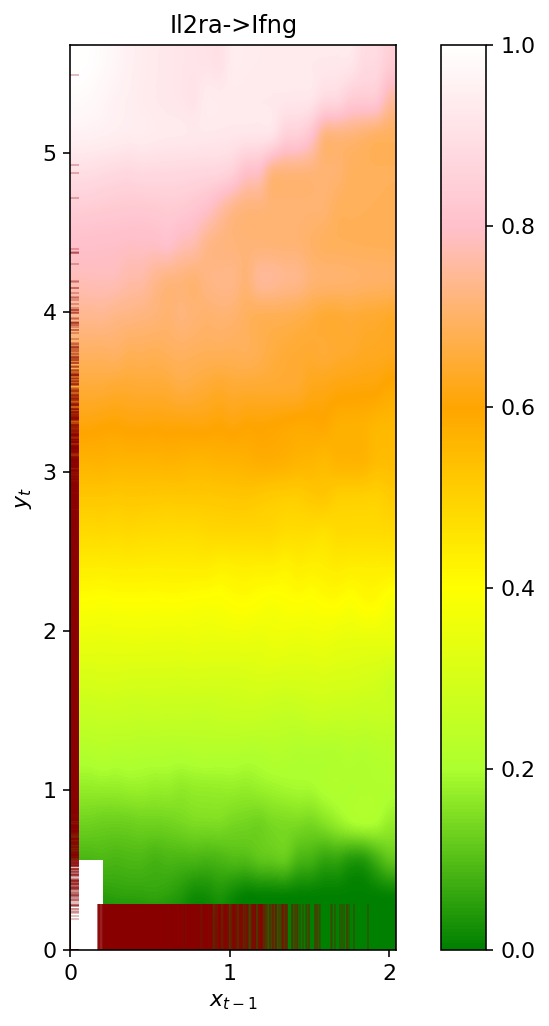

In [5]:
sc.pl.viz_causality(adata,np.array([['Il2ra','Ifng']]),grid_num=25, log=False)

Create causal_model successfully


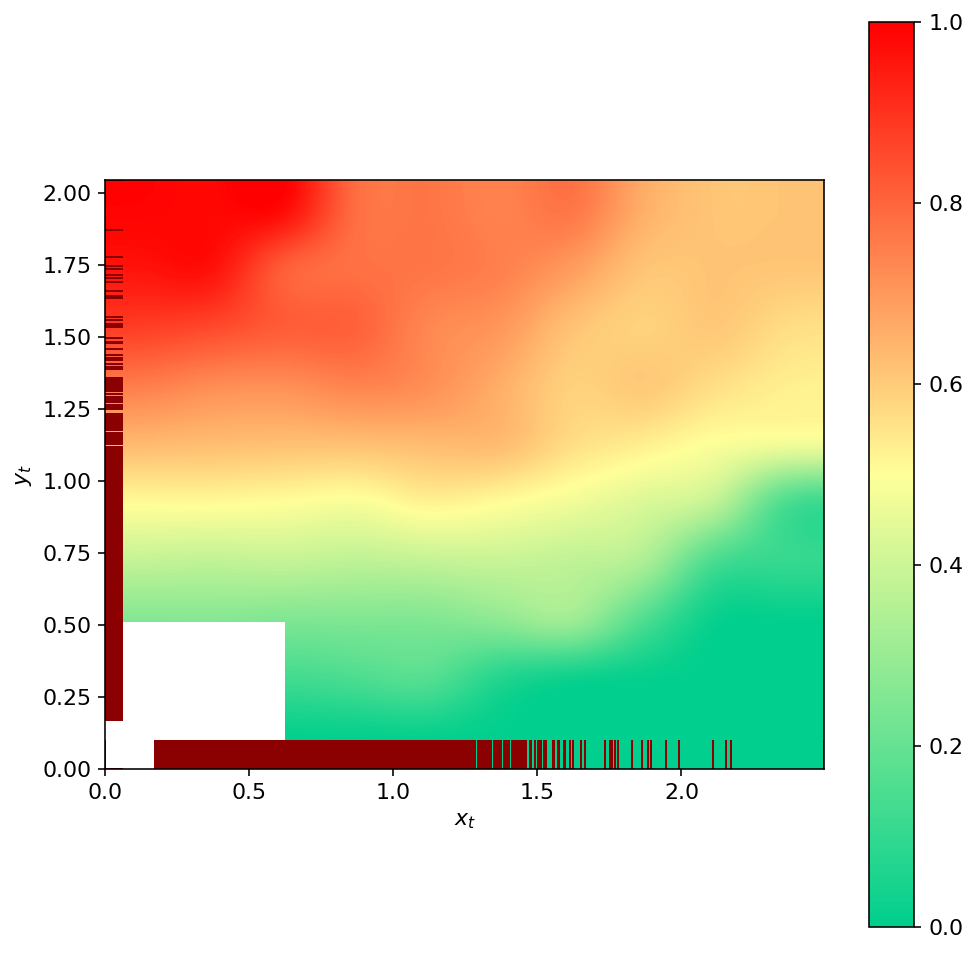

In [7]:
sc.pl.viz_comb_logic(adata,np.array([['Irf4','Il2ra', 'Ifng']]),grid_num=10, log=False)

Calculate causality score (RDI) from each TF to potential target:: 100%|██████████| 6/6 [00:36<00:00,  6.13s/it]


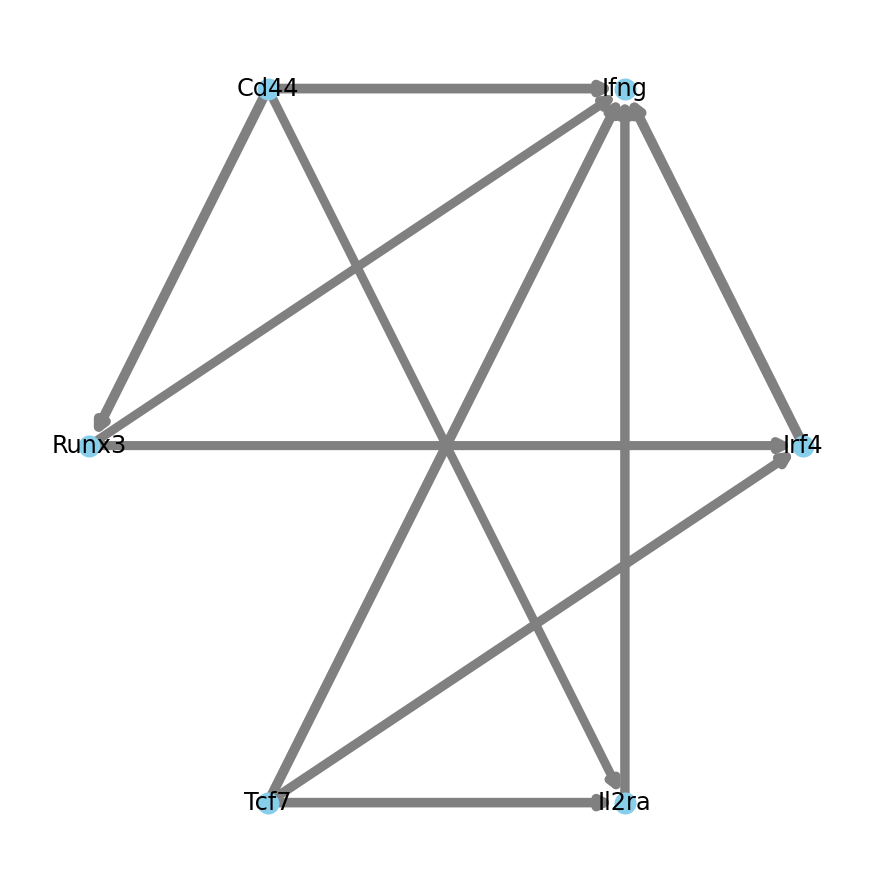

In [8]:
adata_slt_subset = adata[:, ["Il2ra", "Ifng", "Irf4", "Runx3", 'Cd44','Tcf7']].copy()
Scribe(adata_slt_subset, t0_key='spliced', t1_key='unspliced')
sc.pl.vis_causal_net(adata_slt_subset, figsize=[6, 6], layout='circular')